In [1]:
import numpy as np
import pandas as pd
import finance_toolkit as fin

%load_ext autoreload
%autoreload 2

In [2]:
def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rates, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t) # just in case of roundoff errors going negative
        
    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

In [3]:
rates, bond_prices = fin.cir(r_0=0.03, b=0.03, n_scenarios=10)

In [4]:
n_years = 10
n_scenarios=100
a=0.05
b=0.03
sigma=0.05
steps_per_year=12
r_0=0.03

In [5]:
dt = 1/steps_per_year
dt

0.08333333333333333

In [6]:
num_steps = int(n_years*steps_per_year) + 1
num_steps

121

In [7]:
shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
shock.shape

(121, 100)

In [8]:
rates = np.empty_like(shock)
rates

array([[ 9.10573015e-312,  9.10608573e-312,  2.12199579e-314, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         5.82511184e-270,  9.10635504e-312, -6.77402346e+106],
       [ 9.10635949e-312, -3.84180017e+210,  9.10638024e-312, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  9.10614533e-312, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

In [9]:
rates[0]=r_0
rates

array([[ 3.00000000e-002,  3.00000000e-002,  3.00000000e-002, ...,
         3.00000000e-002,  3.00000000e-002,  3.00000000e-002],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         5.82511184e-270,  9.10635504e-312, -6.77402346e+106],
       [ 9.10635949e-312, -3.84180017e+210,  9.10638024e-312, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  9.10614533e-312, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000]])

In [10]:
shock

array([[ 0.32738137,  0.17647325,  0.04446044, ..., -0.09443715,
        -0.08901615,  0.54215105],
       [-0.3359928 ,  0.39856523,  0.62864014, ..., -0.17934296,
         0.05310901,  0.12090436],
       [-0.23241621, -0.3615624 ,  0.33859111, ..., -0.03067558,
        -0.12592338,  0.34490966],
       ...,
       [ 0.48596872, -0.29230254, -0.32105629, ...,  0.56386031,
        -0.03006518, -0.21522079],
       [-0.06862848, -0.54840104, -0.28579001, ...,  0.21953383,
        -0.50290275, -0.05942573],
       [ 0.48054597,  0.19833928, -0.14492713, ...,  0.29005439,
         0.67286862,  0.53322554]])

In [11]:
bond_prices

,0,1,2,3,4,5,6,7,8,9
0,0.749590,0.749590,0.749590,0.749590,0.749590,0.749590,0.749590,0.749590,0.749590,0.749590
1,0.763192,0.741670,0.753557,0.752816,0.759257,0.740281,0.744743,0.740210,0.740470,0.746724
2,0.777278,0.761999,0.766238,0.750138,0.761453,0.718040,0.735282,0.758431,0.738304,0.770337
3,0.771626,0.806752,0.773443,0.758997,0.766367,0.719413,0.746198,0.778200,0.743017,0.783399
4,0.752269,0.812046,0.777706,0.745180,0.777486,0.744343,0.742210,0.778955,0.765640,0.814987
...,...,...,...,...,...,...,...,...,...,...
116,0.991286,0.995643,0.989961,0.993827,0.996016,0.999468,0.997990,0.981494,0.989759,0.986289
117,0.993824,0.996801,0.991958,0.995445,0.996047,0.999629,0.998634,0.985782,0.991925,0.988861
118,0.995492,0.997842,0.994366,0.996873,0.996996,0.999693,0.998851,0.990179,0.995027,0.992547
119,0.997457,0.999040,0.997033,0.998579,0.998335,0.999843,0.999356,0.995365,0.997574,0.996608


In [12]:
a_0 = 0.75
rates, bond_prices = fin.cir(r_0=0.03, b=0.03, n_scenarios=10)
liabilities = bond_prices
zc_0 = fin.pv(pd.Series(data=[1], index=[10]), 0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds*bond_prices
av_cash = a_0*(rates/12+1).cumprod()

<Axes: title={'center': 'Asset Values using Cash (10 scenarios)'}>

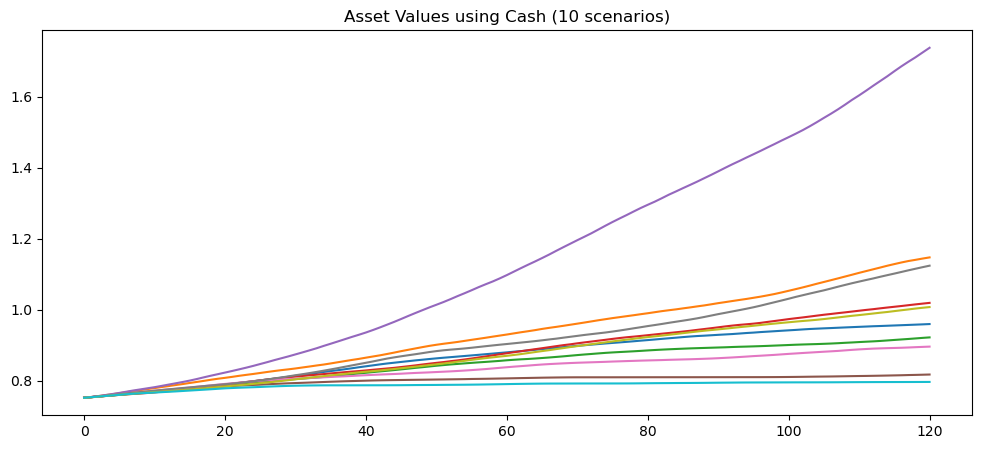

In [13]:
av_cash.plot(title='Asset Values using Cash (10 scenarios)', legend=False, figsize=(12,5))

<Axes: title={'center': 'Returns using Cash (10 scenarios)'}>

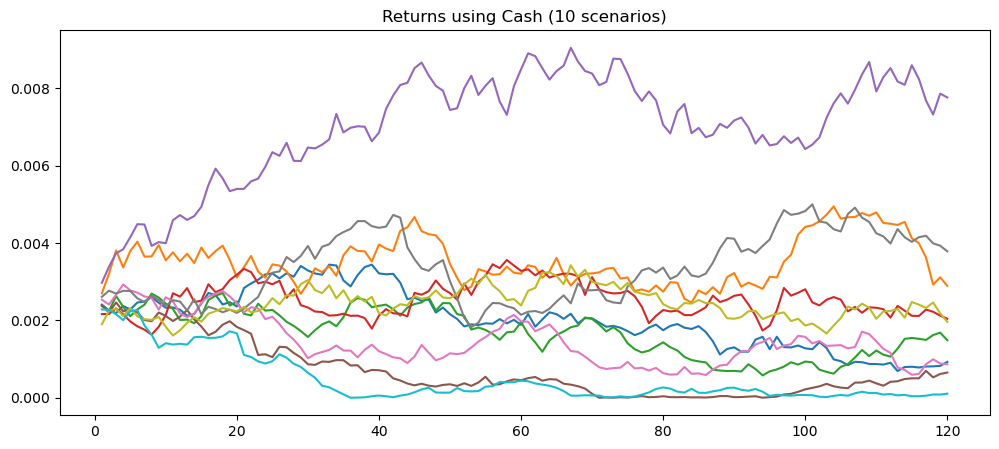

In [14]:
av_cash.pct_change().plot(title='Returns using Cash (10 scenarios)', legend=False, figsize=(12,5))

<Axes: title={'center': 'Returns using ZC Bonds (10 scenarios)'}>

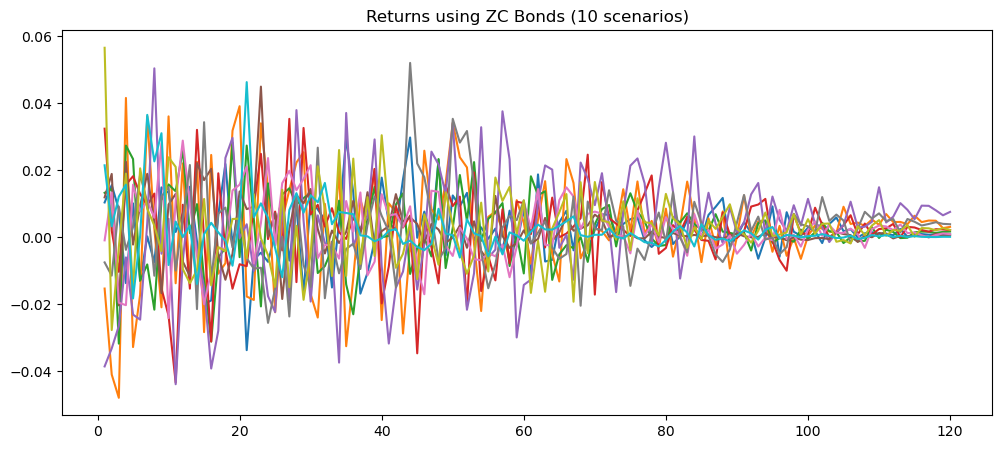

In [15]:
av_zc_bonds.pct_change().plot(title='Returns using ZC Bonds (10 scenarios)', legend=False, figsize=(12,5))

<Axes: title={'center': 'Asset Values using ZC Bonds (10 scenarios)'}>

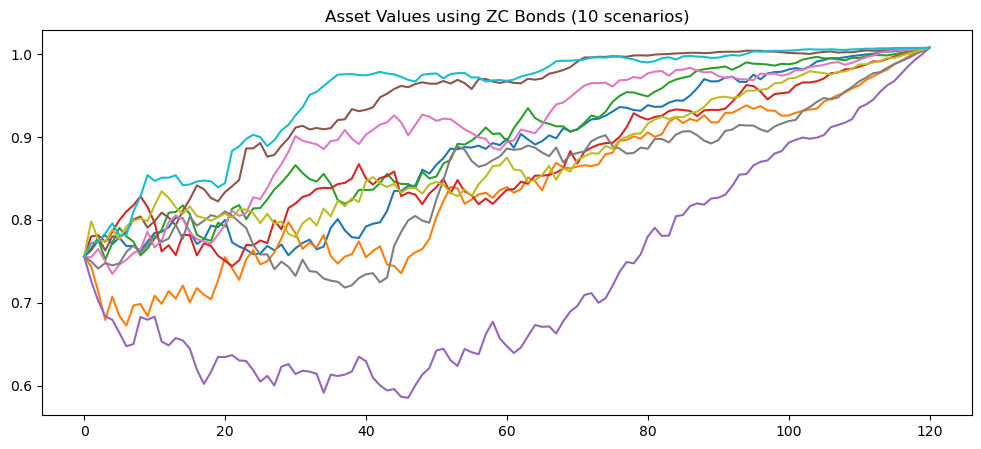

In [16]:
av_zc_bonds.plot(title='Asset Values using ZC Bonds (10 scenarios)', legend=False, figsize=(12,5))

In [17]:
zc_0

0.7440939148967249

<Axes: title={'center': 'Funding Ratio with Cash (10 scenarios)'}>

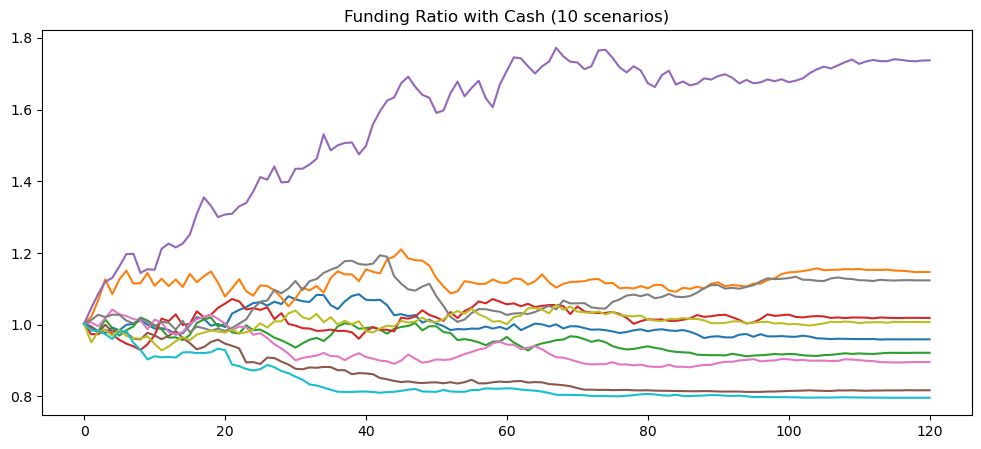

In [18]:
(av_cash/liabilities).plot(title='Funding Ratio with Cash (10 scenarios)', legend=False, figsize=(12,5))

<Axes: title={'center': 'Funding Ratio with ZC Bonds (10 scenarios)'}>

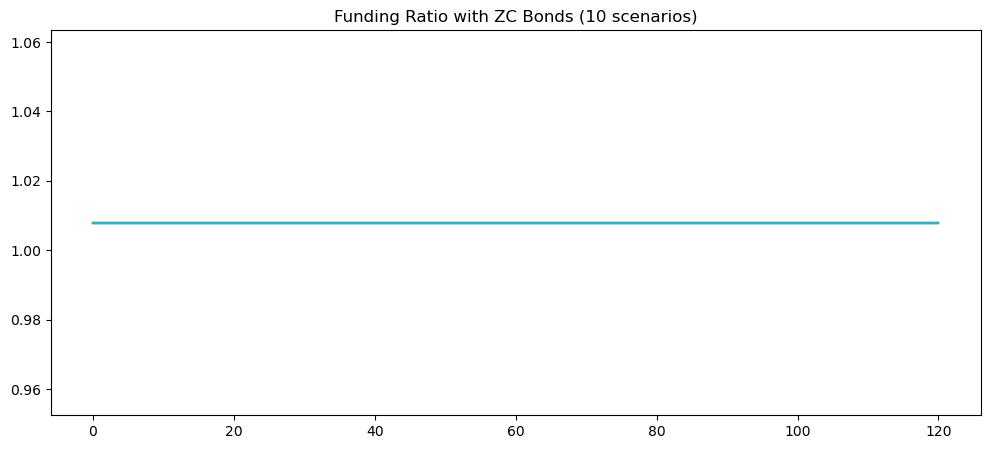

In [19]:
(av_zc_bonds/liabilities).plot(title='Funding Ratio with ZC Bonds (10 scenarios)', legend=False, figsize=(12,5))

In [20]:
rates, bond_prices = fin.cir(r_0=0.03, b=0.03, n_scenarios=1000)

In [21]:
a_0 = 0.75
liabilities = bond_prices

zc_0 = fin.pv(pd.Series(data=[1], index=[10]), 0.03)

n_bonds = a_0/zc_0
av_zc_bonds = n_bonds*bond_prices

av_cash = a_0*(rates/12+1).cumprod()

<Axes: >

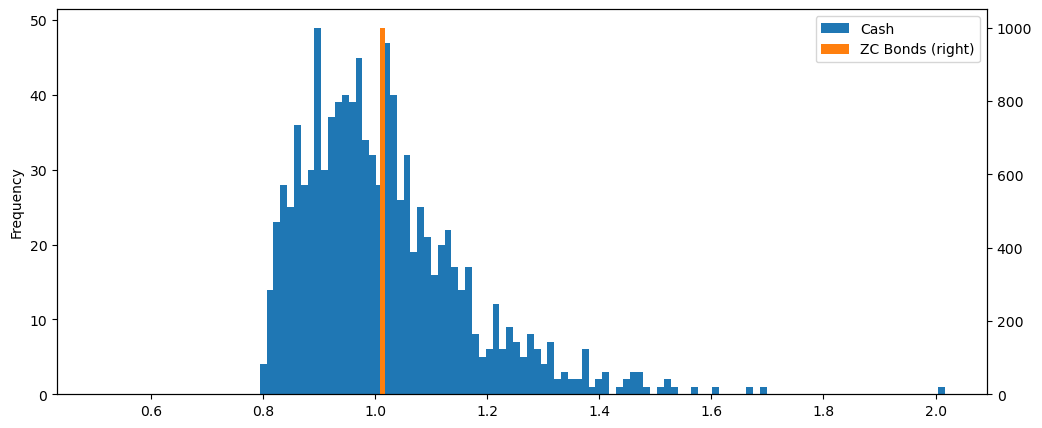

In [22]:
tfr_cash = av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds = av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax = tfr_cash.plot.hist(label="Cash", figsize=(12,5), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax,label="ZC Bonds", bins=100, secondary_y=True, legend=True)

In [23]:
def bond_cash_flows(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):
    """
    Returns the series of cash flows generated by a bond,
    indexed by the payment/coupon number
    """
    n_coupons = round(maturity*coupons_per_year)
    coupon_amt = principal*coupon_rate/coupons_per_year
    coupon_times = np.arange(1, n_coupons+1)
    cash_flows = pd.Series(data=coupon_amt, index=coupon_times)
    cash_flows.iloc[-1] += principal # add the principal to the last payment
    return cash_flows
    
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Computes the price of a bond that pays regular coupons until maturity
    at which time the principal and the final coupon is returned
    This is not designed to be efficient, rather,
    it is to illustrate the underlying principle behind bond pricing!
    """
    cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
    return fin.pv(cash_flows, discount_rate/coupons_per_year)

In [24]:
cf = bond_cash_flows(3, 1000, .06, 2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [25]:
bond_price(20, 1000, 0.05, 2, .04)

1136.7773962036904

<Axes: title={'center': 'Change in 10Y Bond Prices with Interest Rates'}>

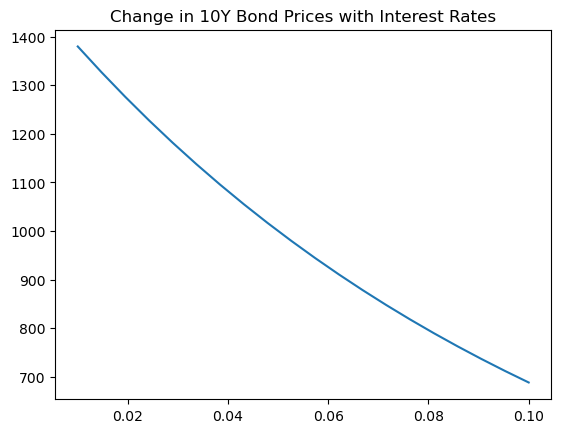

In [26]:
rates = np.linspace(.01, .10, num=20)
prices = [bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
pd.DataFrame(data=prices, index=rates).plot(title="Change in 10Y Bond Prices with Interest Rates", legend=False)

In [27]:
cf = bond_cash_flows(3, 1000, .06, 2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [28]:
discounts = fin.discount(cf.index, .06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [29]:
dcf = (discounts*cf)
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [30]:
(cf.index*dcf).sum()/dcf.sum()

5.5797071871945345

In [31]:
def duration(flows, discount_rate):
    discounted_flows = fin.discount(flows.index, discount_rate)*flows
    weights = discounted_flows/discounted_flows.sum()
    return np.average(flows.index, weights=weights)

In [32]:
duration(bond_cash_flows(3, 1000, .06, 2), 0.06/2)

5.579707187194534

In [33]:
liabilities = pd.Series(data = [100000, 100000], index=[10, 12])
duration(liabilities, .04)

10.960799385088393

In [34]:
md_10 = duration(bond_cash_flows(10, 1000, .05, 1), .04)
md_10

8.190898824083233

In [35]:
md_20 = duration(bond_cash_flows(20, 1000, .05, 1), .04)
md_20

13.544718122145921

In [36]:
def match_durations(cf_t, cf_s, cf_l, discount_rate):
    d_t = duration(cf_t, discount_rate)
    d_s = duration(cf_s, discount_rate)
    d_l = duration(cf_l, discount_rate)
    return (d_l - d_t)/(d_l - d_s)

def funding_ratio(assets, liabilities, r):
    return fin.pv(assets, r)/fin.pv(liabilities, r)

In [37]:
short_bond = bond_cash_flows(10, 1000, .05, 1)
long_bond = bond_cash_flows(20, 1000, .05, 1)
w_s = match_durations(liabilities, short_bond, long_bond, 0.04)
w_s

0.48263092069478974

In [38]:
p_short = bond_price(10, 1000, .05, 1, 0.04)
p_long = bond_price(20, 1000, .05, 1, 0.04)
a_0 = 130000
dm_assets=pd.concat([a_0*w_s*short_bond/p_short,a_0*(1-w_s)*long_bond/p_long])
duration(dm_assets, 0.04)

10.960799385088393

In [39]:
duration(liabilities, 0.04)

10.960799385088393

In [40]:
lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short

<Axes: title={'center': 'Change in Funding Ratio'}>

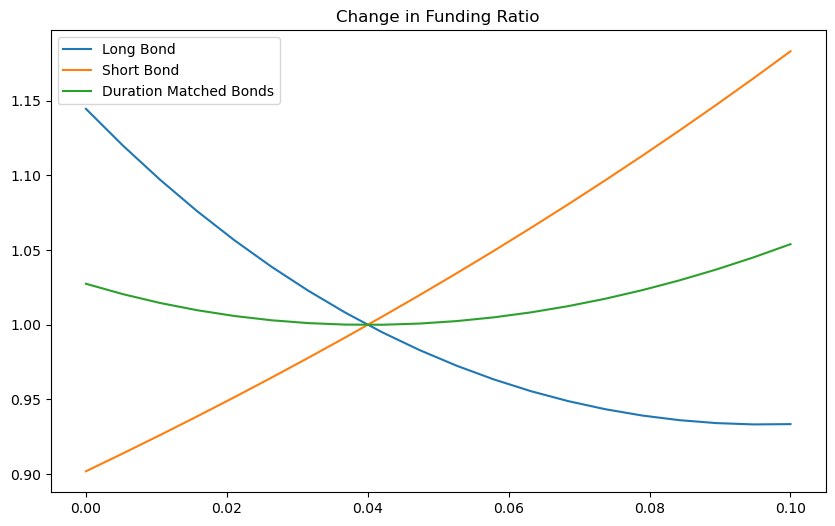

In [41]:
rates = np.linspace(0, .1, 20)
fr_change = pd.DataFrame({
    "Long Bond":[funding_ratio(lb_assets, liabilities, r) for r in rates],
    "Short Bond":[funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds":[funding_ratio(dm_assets, liabilities, r) for r in rates]
}, index=rates)
fr_change.plot(title='Change in Funding Ratio', figsize=(10,6))